In [1]:
# Import the packages we will use
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import math

In [2]:
# The following directive activates inline plotting
%matplotlib inline

###### Select chromose to work with

In [3]:
chr_index = 1
chr = 'chr' + str(chr_index)

###### Read loops coordinates, sizes and etc

In [4]:
loops_info = pandas.read_csv('GSE63525_GM12878_primary+replicate_HiCCUPS_looplist.txt', sep='\t',
                             dtype = {'x1': np.long, 'x2': np.long, 'y1': np.long, 'y2': np.long})
loops = loops_info[loops_info.chr1 == str(chr_index)]

In [5]:
resolution = 10 ** 4

### Scaling

In [6]:
arr = np.load('arrs/10kb_' + str(chr_index) + 'chr_norm.npy')

In [7]:
def resize_image_arr(original_image, width, height):
    resize_image = np.zeros(shape=(width,height))
    for W in range(width):
        for H in range(height):
            new_width = int( W * original_image.shape[0] / width )
            new_height = int( H * original_image.shape[1] / height )
            resize_image[W][H] = original_image[new_width][new_height]
            
    return resize_image

In [8]:
loop_new_size = 100

In [9]:
width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for index, row in loops.iterrows():
        
    window = 1
    
    # the coordinates of the upstream locus corresponding to the peak pixel
    x1 = int(row['x1']/resolution)
    x2 = int(row['x2']/resolution)

    # the coordinates of the downstream locus corresponding to the peak pixel
    y1 = int(row['y1']/resolution)
    y2 = int(row['y2']/resolution)
    
    original_image = arr[x1-window:y1+window, x2-window:y2+window]
    resize_image = resize_image_arr(original_image, width, height)
    
    resize_image[resize_image == -np.inf] = 0
    resize_image = np.nan_to_num(resize_image) 
    
    resize_image_sum = resize_image_sum + resize_image

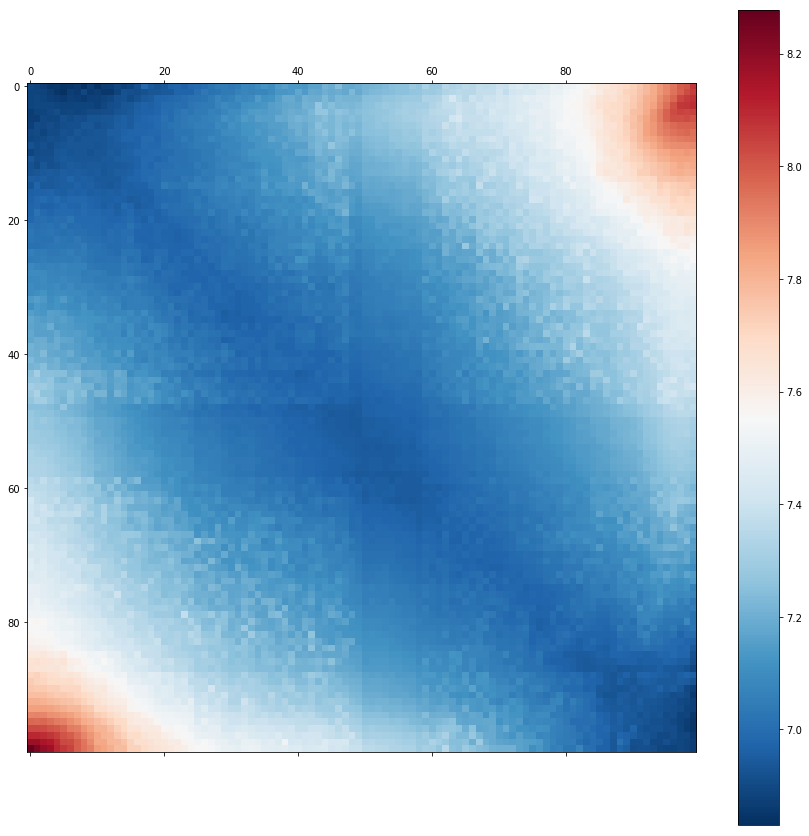

In [10]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

im = ax.matshow(np.log(resize_image_sum), cmap='RdBu_r')
fig.colorbar(im)

#### Calculate mean contact above the distance between bins

In [11]:
def calc_densities_mean(arr):
    '''
        calculate mean of each diagonal
        mean of each diagonal corresponds for the density for each genimic size step
    '''
    density = np.zeros(arr.shape[0])
    for i in range(arr.shape[0]):
        density[i] = np.nanmean(np.diagonal(arr, i))
        
    return density

In [12]:
def calc_densities_sum(arr):
    '''
        calculate mean of each diagonal
        sum of each diagonal corresponds for the density for each genimic size step
    '''
    density = np.zeros(arr.shape[0])
    for i in range(arr.shape[0]):
        density[i] = np.nansum(np.diagonal(arr, i))
        
    return density

In [13]:
def plot_densities(densities):
    fig = plt.figure()
    ax = plt.axes()

    for density in densities:
        plt.plot(np.log(range(density.shape[0])), np.log(density), 'b');
    plt.show()

###### raw data

In [14]:
arr = np.load('arrs/10kb_' + str(chr_index) + 'chr.npy')

#### loops

###### mean

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


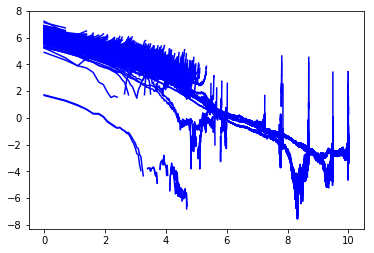

In [15]:
densities = []

for idx, row in loops.iterrows():
    
    # the coordinates of the upstream locus corresponding to the peak pixel
    x1 = int(row['x1']/resolution)
    x2 = int(row['x2']/resolution)

    # the coordinates of the downstream locus corresponding to the peak pixel
    y1 = int(row['y1']/resolution)
    y2 = int(row['y2']/resolution)
    
    loop = arr[x1:y1, x2:y2]
    loop[loop == -np.inf] = 0
    
    density = calc_densities_mean(loop)
    densities.append(density)
    
plot_densities(densities)

###### sum

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


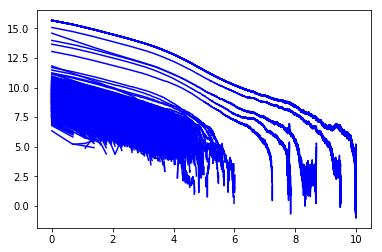

In [16]:
densities = []

for idx, row in loops.iterrows():
    
    # the coordinates of the upstream locus corresponding to the peak pixel
    x1 = int(row['x1']/resolution)
    x2 = int(row['x2']/resolution)

    # the coordinates of the downstream locus corresponding to the peak pixel
    y1 = int(row['y1']/resolution)
    y2 = int(row['y2']/resolution)
    
    loop = arr[x1:y1, x2:y2]
    loop[loop == -np.inf] = 0
    
    density = calc_densities_sum(loop)
    densities.append(density)
    
plot_densities(densities)

#### between loops

###### mean

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


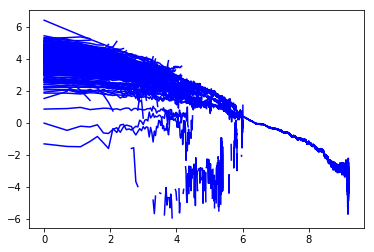

In [17]:
densities = []
        
x_begin = 0
y_begin = 0

for idx, row in loops.iterrows():
    
    # the coordinates of the upstream locus corresponding to the peak pixel
    x1 = int(row['x1']/resolution)
    x2 = int(row['x2']/resolution)

    # the coordinates of the downstream locus corresponding to the peak pixel
    y1 = int(row['y1']/resolution)
    y2 = int(row['y2']/resolution)
    
    if x_begin < x1 and y_begin < y1:
        a = arr[x_begin:x1, y_begin:y1]
        a[a == -np.inf] = 0

        x_begin = x2
        y_begin = y2

        density = calc_densities_mean(a)
        densities.append(density)
        
plot_densities(densities)

###### sum

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


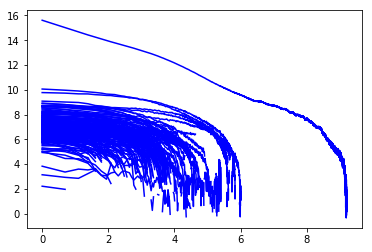

In [18]:
densities = []
        
x_begin = 0
y_begin = 0

for idx, row in loops.iterrows():
    
    # the coordinates of the upstream locus corresponding to the peak pixel
    x1 = int(row['x1']/resolution)
    x2 = int(row['x2']/resolution)

    # the coordinates of the downstream locus corresponding to the peak pixel
    y1 = int(row['y1']/resolution)
    y2 = int(row['y2']/resolution)
    
    if x_begin < x1 and y_begin < y1:
        a = arr[x_begin:x1, y_begin:y1]
        a[a == -np.inf] = 0

        x_begin = x2
        y_begin = y2

        density = calc_densities_sum(a)
        densities.append(density)
        
plot_densities(densities)

### Scaling in one size

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


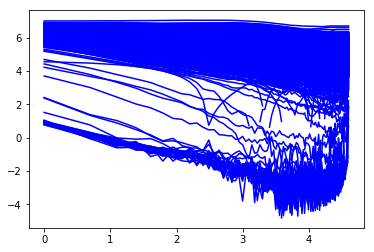

In [19]:
densities = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, row in loops.iterrows():
    
    # the coordinates of the upstream locus corresponding to the peak pixel
    x1 = int(row['x1']/resolution)
    x2 = int(row['x2']/resolution)

    # the coordinates of the downstream locus corresponding to the peak pixel
    y1 = int(row['y1']/resolution)
    y2 = int(row['y2']/resolution)
    
    original_image = arr[x1:y1, x2:y2]
    resize_image = resize_image_arr(original_image, width, height)
    
    resize_image[resize_image == -np.inf] = 0
    resize_image = np.nan_to_num(resize_image) 
    
    loop = resize_image
    
    density = calc_densities_mean(loop)
    densities.append(density)
    
plot_densities(densities)

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


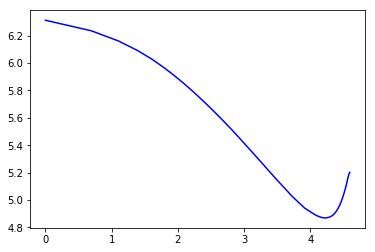

In [20]:
fig = plt.figure()
ax = plt.axes()

sum_density = densities[0]

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_loops_mean_rao', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()

In [21]:
densities = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, row in loops.iterrows():
    
    # the coordinates of the upstream locus corresponding to the peak pixel
    x1 = int(row['x1']/resolution)
    x2 = int(row['x2']/resolution)

    # the coordinates of the downstream locus corresponding to the peak pixel
    y1 = int(row['y1']/resolution)
    y2 = int(row['y2']/resolution)
    
    original_image = arr[x1:y1, x2:y2]
    resize_image = resize_image_arr(original_image, width, height)
    
    resize_image[resize_image == -np.inf] = 0
    resize_image = np.nan_to_num(resize_image) 
    
    loop = resize_image
    
    density = calc_densities_sum(loop)
    densities.append(density)

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


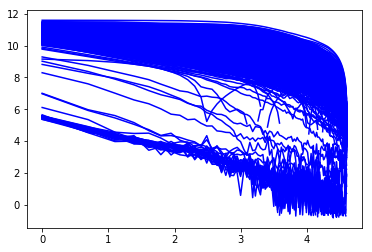

In [22]:
fig = plt.figure()
ax = plt.axes()

for density in densities:
    plt.plot(np.log(range(density.shape[0])), np.log(density), 'b');
plt.show()

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


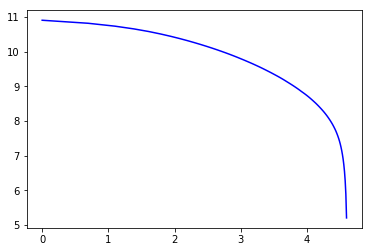

In [23]:
fig = plt.figure()
ax = plt.axes()

sum_density = densities[0]

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_loops_sum_rao', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()

### between loops

In [24]:
densities = []
        
x_begin = 0
y_begin = 0

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, row in loops.iterrows():
    
    # the coordinates of the upstream locus corresponding to the peak pixel
    x1 = int(row['x1']/resolution)
    x2 = int(row['x2']/resolution)

    # the coordinates of the downstream locus corresponding to the peak pixel
    y1 = int(row['y1']/resolution)
    y2 = int(row['y2']/resolution)
    
    if x_begin < x1 and y_begin < y1:        
        original_image = arr[x_begin:x1, y_begin:y1]
        resize_image = resize_image_arr(original_image, width, height)
    
        resize_image[resize_image == -np.inf] = 0
        resize_image = np.nan_to_num(resize_image) 
    
        a = resize_image

        x_begin = x2
        y_begin = y2

        density = calc_densities_mean(a)
        densities.append(density)

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


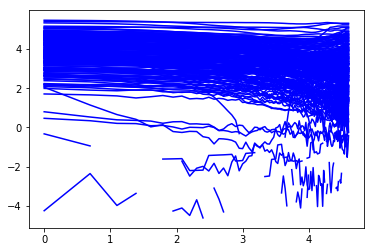

In [25]:
fig = plt.figure()
ax = plt.axes()

for density in densities:
    plt.plot(np.log(range(density.shape[0])), np.log(density), 'b');
plt.show()

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


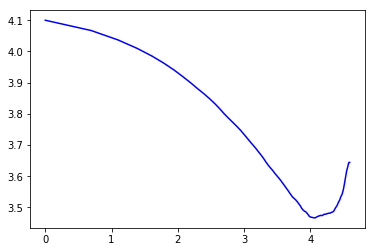

In [26]:
fig = plt.figure()
ax = plt.axes()

sum_density = densities[0]

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_btw_mean_rao', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()

In [27]:
densities = []
        
x_begin = 0
y_begin = 0

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, row in loops.iterrows():
    
    # the coordinates of the upstream locus corresponding to the peak pixel
    x1 = int(row['x1']/resolution)
    x2 = int(row['x2']/resolution)

    # the coordinates of the downstream locus corresponding to the peak pixel
    y1 = int(row['y1']/resolution)
    y2 = int(row['y2']/resolution)
    
    if x_begin < x1 and y_begin < y1:        
        original_image = arr[x_begin:x1, y_begin:y1]
        resize_image = resize_image_arr(original_image, width, height)
    
        resize_image[resize_image == -np.inf] = 0
        resize_image = np.nan_to_num(resize_image) 
    
        a = resize_image

        x_begin = x2
        y_begin = y2

        density = calc_densities_sum(a)
        densities.append(density)

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


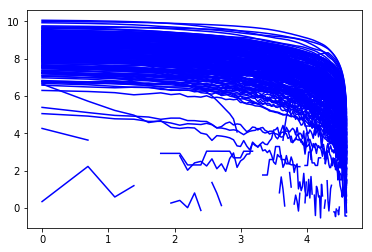

In [28]:
fig = plt.figure()
ax = plt.axes()

for density in densities:
    plt.plot(np.log(range(density.shape[0])), np.log(density), 'b');
plt.show()

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


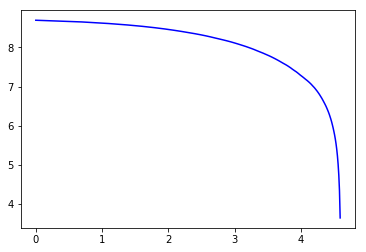

In [29]:
fig = plt.figure()
ax = plt.axes()

sum_density = densities[0]

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_btw_sum_rao', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()